# DATA AUGMENTATION USING TENSORFLOW IMAGE

In [15]:
# Import Dependencies
import import_ipynb
import Utils
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Visualization Function
def visualize(original, augmented):
    plt.subplot(1, 2, 1)
    plt.imshow(original)

    plt.subplot(1, 2, 2)
    plt.imshow(augmented)

In [5]:
# Loading Original Image
originalImage, labels = next(iter(Utils.trainDataset))

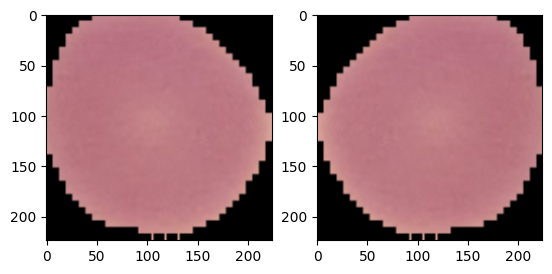

In [6]:
# Flip Left Right
augmentedImage = tf.image.flip_left_right(originalImage)
visualize(originalImage, augmentedImage)

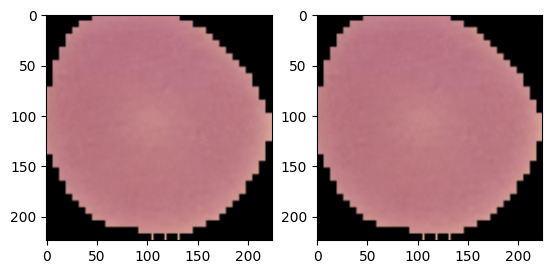

In [7]:
# Random Flip Up Down
augmentedImage = tf.image.random_flip_up_down(originalImage)
visualize(originalImage, augmentedImage)

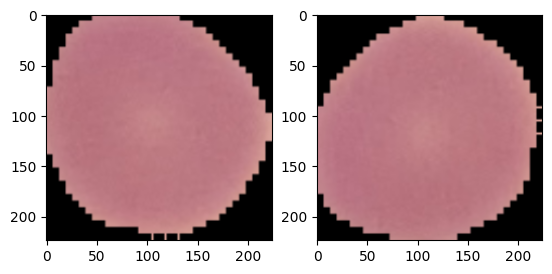

In [8]:
# Rotate 90 Degrees Counter-Clockwise
augmentedImage = tf.image.rot90(originalImage)
visualize(originalImage, augmentedImage)

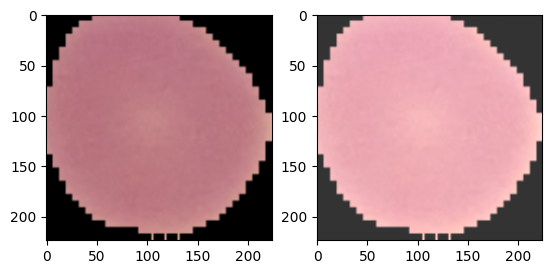

In [9]:
# Adjust Brightness
augmentedImage = tf.image.adjust_brightness(originalImage, delta=0.2) # Amount to add to pixel values (- means darker)
visualize(originalImage, augmentedImage)

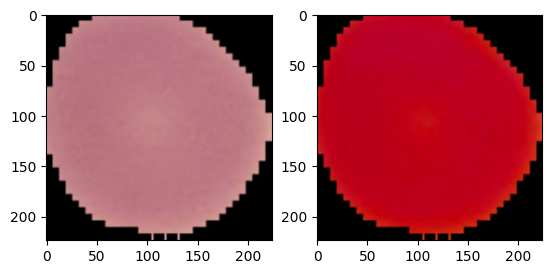

In [10]:
# Random Saturation
augmentedImage = tf.image.random_saturation(originalImage, lower=2, upper=5)
visualize(originalImage, augmentedImage)

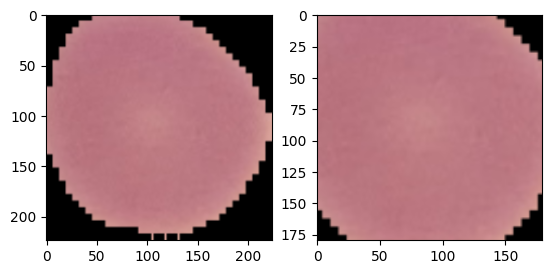

In [11]:
# Central Crop
augmentedImage = tf.image.central_crop(originalImage, central_fraction=0.8) # 0.8 means 80% of image -> range(0, 1)
visualize(originalImage, augmentedImage)

# Adding Data Augmentation To The Pipeline

In [12]:
# Augmentation Method
def augment(image, label):
    image = tf.image.rot90(image)
    image = tf.image.adjust_saturation(image, saturation_factor=0.3)
    image = tf.image.flip_left_right(image)
    image = tf.image.central_crop(image, central_fraction=0.9)
    image = tf.image.resize(image, (224, 224))
    return image, label

In [13]:
# Dataset Batching
BATCH_SIZE=32
BUFFER_SIZE = 8
trainDataset = Utils.trainDataset.map(augment).shuffle(buffer_size=BUFFER_SIZE, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
valDataset = Utils.valDataset.shuffle(buffer_size=BUFFER_SIZE, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
testDataset = Utils.testDataset.shuffle(buffer_size=BUFFER_SIZE, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [14]:
# Training
history = Utils.model.fit(trainDataset, validation_data=valDataset, epochs=5, verbose=1)

Epoch 1/5


2025-01-22 17:22:16.279245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


689/689 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - auc: 0.6404 - binary_accuracy: 0.6058 - false_negatives: 2324.4160 - false_positives: 2008.3579 - loss: 0.6728 - precision: 0.6129 - recall: 0.5895 - true_negatives: 3510.4551 - true_positives: 3212.7188 - val_auc: 0.6767 - val_binary_accuracy: 0.6352 - val_false_negatives: 496.0000 - val_false_positives: 509.0000 - val_loss: 0.6900 - val_precision: 0.6377 - val_recall: 0.6437 - val_true_negatives: 854.0000 - val_true_positives: 896.0000
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 44s 64ms/step - auc: 0.7581 - binary_accuracy: 0.7275 - false_negatives: 885.7696 - false_positives: 2007.7203 - loss: 0.6008 - precision: 0.6949 - recall: 0.8183 - true_negatives: 3511.0479 - true_positives: 4651.4102 - val_auc: 0.7477 - val_binary_accuracy: 0.7448 - val_false_negatives: 387.0000 - val_false_positives: 316.0000 - val_loss: 1.1840 - val_precision: 0.7602 - val_recall: 0.7214 - val_true_negatives: 1050.0000 - val_true_positives: 1002.0000
Epoch 3/5
689/6